In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt_kwargs = {'figsize': (10, 6)}
%matplotlib inline

In [2]:
openPL = pd.read_csv('openpowerlifting.csv')
recent_1 = pd.read_csv('recent_1.csv', index_col=None)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
openPL.columns

Index(['MeetID', 'Name', 'Sex', 'Equipment', 'Age', 'Division', 'BodyweightKg',
       'WeightClassKg', 'Squat4Kg', 'BestSquatKg', 'Bench4Kg', 'BestBenchKg',
       'Deadlift4Kg', 'BestDeadliftKg', 'TotalKg', 'Place', 'Wilks'],
      dtype='object')

In [4]:
openPL.dtypes

MeetID              int64
Name               object
Sex                object
Equipment          object
Age               float64
Division           object
BodyweightKg      float64
WeightClassKg      object
Squat4Kg          float64
BestSquatKg       float64
Bench4Kg          float64
BestBenchKg       float64
Deadlift4Kg       float64
BestDeadliftKg    float64
TotalKg           float64
Place              object
Wilks             float64
dtype: object

In [5]:
openPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386414 entries, 0 to 386413
Data columns (total 17 columns):
MeetID            386414 non-null int64
Name              386414 non-null object
Sex               386414 non-null object
Equipment         386414 non-null object
Age               147147 non-null float64
Division          370571 non-null object
BodyweightKg      384012 non-null float64
WeightClassKg     382602 non-null object
Squat4Kg          1243 non-null float64
BestSquatKg       298071 non-null float64
Bench4Kg          1962 non-null float64
BestBenchKg       356364 non-null float64
Deadlift4Kg       2800 non-null float64
BestDeadliftKg    317847 non-null float64
TotalKg           363237 non-null float64
Place             385322 non-null object
Wilks             362194 non-null float64
dtypes: float64(10), int64(1), object(6)
memory usage: 50.1+ MB


In [6]:
recent_1.shape

(248598, 14)

In [7]:
recent_1.isnull().sum() #calulate year of birth from multiple meet data
#recent_1.

MeetID                 0
Sex                    0
Equipment              0
Age               147781
Division            9152
BodyweightKg           0
BestSquatKg            0
BestBenchKg            0
BestDeadliftKg         0
TotalKg                0
Place                684
Wilks                  0
year                   0
AthID                  0
dtype: int64

In [8]:
# from keras.models import Sequential
# from keras.layers import Dense
# #Use this with the tutorial on Machine learning mastery website:
# from keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
# from sklearn.pipeline import Pipeline

In [9]:
recent_1.columns
recent_1.head()

,MeetID,Sex,Equipment,Age,Division,BodyweightKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Place,Wilks,year,AthID
0,0,0,3,47.0,Mst 45-49,59.60,47.63,20.41,70.31,138.35,1,155.05,2016,6873
1,0,0,2,42.0,Mst 40-44,58.51,142.88,95.25,163.29,401.42,1,456.38,2016,26767
2,0,0,2,42.0,Open Senior,58.51,142.88,95.25,163.29,401.42,1,456.38,2016,26767
3,0,0,3,28.0,Open Senior,62.41,170.10,77.11,145.15,392.36,1,424.40,2016,22630
4,0,0,1,60.0,Mst 60-64,67.31,124.74,95.25,163.29,383.28,1,391.98,2016,68418


<<<----Start here---->>>
Predict leaderboard placement, Current dataset is all scores after 2012 for all athletes.

<<<<<<<<<<<<<<<<<---------------------meet stuff-------------->>>>>>>>>>>>

In [10]:
meets = pd.read_csv('meets.csv')
#Add timezone here!!
meets.head(1)

,MeetID,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,0,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...


In [11]:
recent_1 = pd.merge(recent_1, meets, on='MeetID')

In [12]:
recent_1.head()

,MeetID,Sex,Equipment,Age,Division,BodyweightKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,...,Wilks,year,AthID,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,0,0,3,47.0,Mst 45-49,59.60,47.63,20.41,70.31,138.35,...,155.05,2016,6873,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
1,0,0,2,42.0,Mst 40-44,58.51,142.88,95.25,163.29,401.42,...,456.38,2016,26767,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
2,0,0,2,42.0,Open Senior,58.51,142.88,95.25,163.29,401.42,...,456.38,2016,26767,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
3,0,0,3,28.0,Open Senior,62.41,170.10,77.11,145.15,392.36,...,424.40,2016,22630,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
4,0,0,1,60.0,Mst 60-64,67.31,124.74,95.25,163.29,383.28,...,391.98,2016,68418,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...


In [13]:
recent_1.shape
recent_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248598 entries, 0 to 248597
Data columns (total 21 columns):
MeetID            248598 non-null int64
Sex               248598 non-null int64
Equipment         248598 non-null int64
Age               100817 non-null float64
Division          239446 non-null object
BodyweightKg      248598 non-null float64
BestSquatKg       248598 non-null float64
BestBenchKg       248598 non-null float64
BestDeadliftKg    248598 non-null float64
TotalKg           248598 non-null float64
Place             247914 non-null object
Wilks             248598 non-null float64
year              248598 non-null int64
AthID             248598 non-null int64
MeetPath          248598 non-null object
Federation        248598 non-null object
Date              248598 non-null object
MeetCountry       248598 non-null object
MeetState         217659 non-null object
MeetTown          178802 non-null object
MeetName          248598 non-null object
dtypes: float64(7), int64(

In [14]:
recent_1['EventDate']  = pd.to_datetime(recent_1['Date'])

#recent_1.sort_values(by=['EventDate'], axis=1, ascending=True)
recent_1 = recent_1.sort('EventDate', ascending=False)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  after removing the cwd from sys.path.


In [15]:
recent_1.dtypes

MeetID                     int64
Sex                        int64
Equipment                  int64
Age                      float64
Division                  object
BodyweightKg             float64
BestSquatKg              float64
BestBenchKg              float64
BestDeadliftKg           float64
TotalKg                  float64
Place                     object
Wilks                    float64
year                       int64
AthID                      int64
MeetPath                  object
Federation                object
Date                      object
MeetCountry               object
MeetState                 object
MeetTown                  object
MeetName                  object
EventDate         datetime64[ns]
dtype: object

In [16]:
recent_1['est_birth_year'] = recent_1['year'] - recent_1['Age']
recent_1[['AthID', 'est_birth_year', 'year', 'Age']].head()

,AthID,est_birth_year,year,Age
30119,83730,1995.0,2018,23.0
30120,79778,1986.0,2018,32.0
30121,74739,1987.0,2018,31.0
30122,60747,1988.0,2018,30.0
30123,40685,1994.0,2018,24.0


In [17]:
recent_1['duplicates'] = recent_1.groupby(['AthID', 'MeetID']).cumcount()+1

In [18]:
recent_1.head(1)

,MeetID,Sex,Equipment,Age,Division,BodyweightKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,...,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,MeetName,EventDate,est_birth_year,duplicates
30119,1312,0,3,23.0,F-OR,55.25,142.5,77.5,162.5,382.5,...,gpc-aus/1802,GPC-AUS,2018-01-28,Australia,NSW,NaN,Summer Showdown,2018-01-28,1995.0,1


In [19]:
recent_1=recent_1[recent_1.duplicates ==1]

In [20]:
recent_1.shape

(235298, 24)

In [21]:
#Do this after duplicates removed#
recent_1['Competition_experience'] = recent_1.groupby(['AthID']).cumcount()+1

recent_1.dtypes

MeetID                             int64
Sex                                int64
Equipment                          int64
Age                              float64
Division                          object
BodyweightKg                     float64
BestSquatKg                      float64
BestBenchKg                      float64
BestDeadliftKg                   float64
TotalKg                          float64
Place                             object
Wilks                            float64
year                               int64
AthID                              int64
MeetPath                          object
Federation                        object
Date                              object
MeetCountry                       object
MeetState                         object
MeetTown                          object
MeetName                          object
EventDate                 datetime64[ns]
est_birth_year                   float64
duplicates                         int64
Competition_expe

In [22]:
recent_1.duplicates.value_counts() #This verifies: each athlete has 1 score reported per meet

1    235298
Name: duplicates, dtype: int64

In [23]:
print('Most Event Experience:', recent_1.Competition_experience.max(), 'events', '\nStandard Deviation:', recent_1.Competition_experience.std())

Most Event Experience: 41 events 
Standard Deviation: 2.57282138201


In [24]:
recent_1['BodyweightKg'].mean()

85.351445813394065

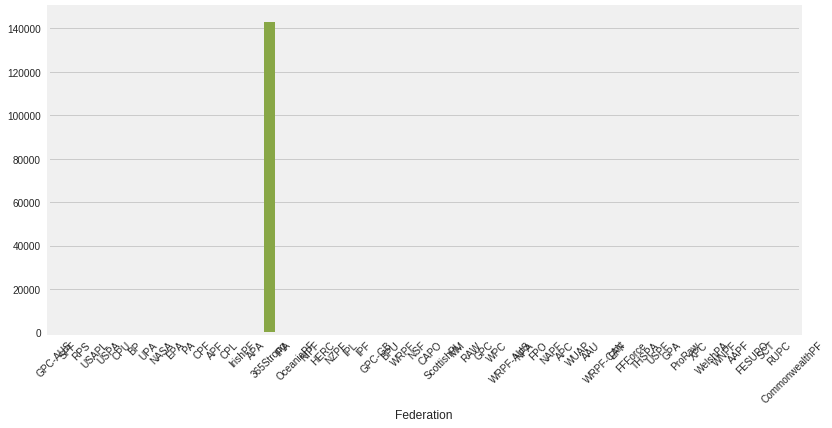

In [25]:
plt.subplots(figsize=(12, 6))
plt.xticks(rotation=45)
sns.barplot(x=recent_1['Federation'], y=recent_1['Age'].isnull().sum())

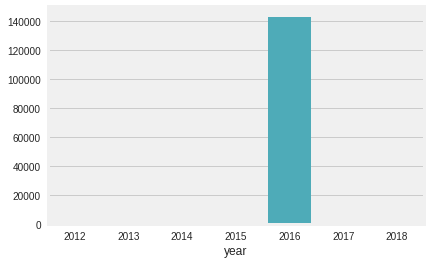

In [26]:
#recent_1['Federation'].where(recent_1['Age'].isnull())
sns.barplot(x=recent_1['year'], y=recent_1['Age'].isnull().sum())

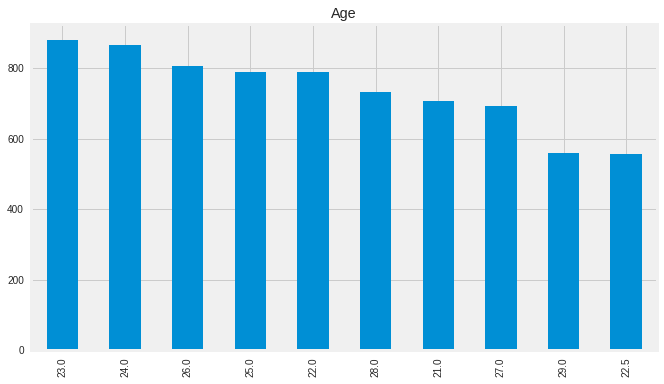

In [27]:
x=[]
x = recent_1['Age'].loc[recent_1['year'] == 2016]

x.value_counts().head(10).plot.bar(
    title='Age', **plt_kwargs)

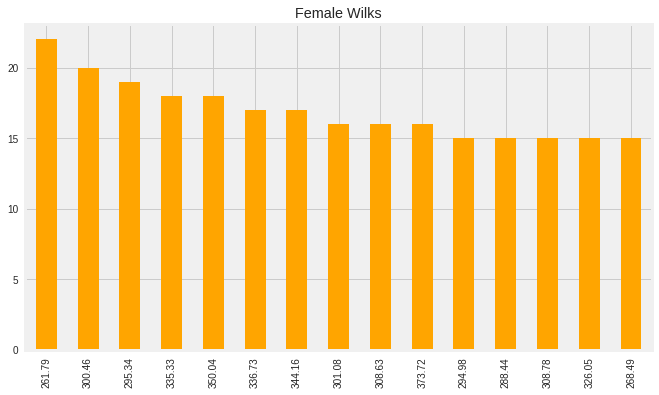

In [28]:
z=[]
z = recent_1['Wilks'].loc[recent_1['Sex'] == 0]
#sns.distplot(x)
#plt.bar(x, x.sum())

z.value_counts().head(15).plot.bar(
    title='Female Wilks', color='orange', **plt_kwargs)

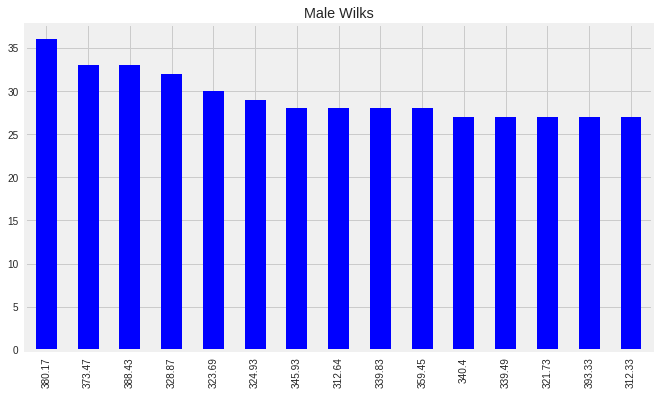

In [29]:
z=[]
z = recent_1['Wilks'].loc[recent_1['Sex'] == 1]
#sns.distplot(x)
#plt.bar(x, x.sum())

z.value_counts().head(15).plot.bar(
    title='Male Wilks', color='blue', **plt_kwargs)

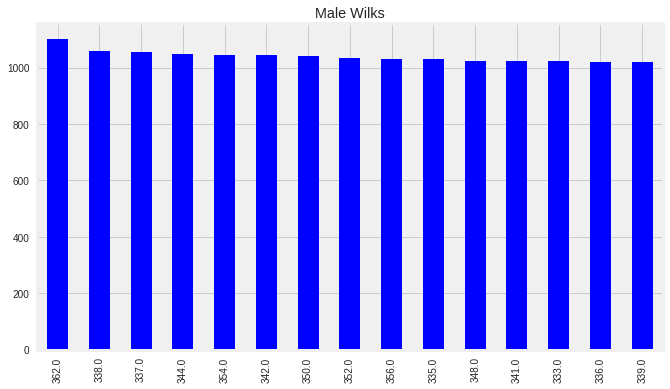

In [30]:
z=[]
z = round(recent_1['Wilks'].loc[recent_1['Sex'] == 1])
#sns.distplot(x)
#plt.bar(x, x.sum())

z.value_counts().head(15).plot.bar(
    title='Male Wilks', color='blue', **plt_kwargs)

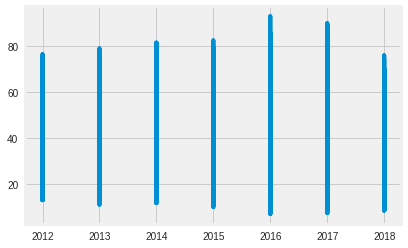

In [31]:
plt.plot(recent_1['year'], recent_1['Age'])

In [32]:
to_drop = ['BestSquatKg', 'BestBenchKg', 'BestDeadliftKg', 'TotalKg', 'year', 'MeetName', 'duplicates']
#'AS_SquatKg', 'AS_BenchKg', 'AS_DLKg', 'AS_Total'
recent_1 = recent_1.drop(to_drop, axis=1)

In [33]:
recent_1.groupby(['AthID']).max()#this tells me the minimum or maximum. also 100911 unique AthID's

,MeetID,Sex,Equipment,Age,BodyweightKg,Wilks,MeetPath,Federation,Date,MeetCountry,EventDate,est_birth_year,Competition_experience
AthID,,,,,,,,,,,,,
0,1233,1,1,NaN,90.90,336.660,epa/1401,EPA,2014-08-16,England,2014-08-16,NaN,1
1,6005,1,2,NaN,101.15,324.280,thspa/2632,THSPA,2016-02-20,USA,2016-02-20,NaN,1
2,1234,1,1,NaN,63.00,422.610,epa/1501,EPA,2015-08-14,England,2015-08-14,NaN,1
3,1233,1,1,NaN,98.70,367.100,epa/1401,EPA,2014-08-16,England,2014-08-16,NaN,1
4,7971,1,1,22.0,123.90,376.783,uspa/0563,USPA,2016-02-27,USA,2016-02-27,1994.0,1
5,1234,1,1,NaN,89.30,341.310,epa/1501,EPA,2015-08-14,England,2015-08-14,NaN,1
6,1234,1,1,NaN,87.55,335.170,epa/1501,EPA,2015-08-14,England,2015-08-14,NaN,1
7,1234,1,1,NaN,112.60,331.670,epa/1501,EPA,2015-08-14,England,2015-08-14,NaN,1
8,1233,1,1,NaN,131.45,413.490,epa/1401,EPA,2014-08-16,England,2014-08-16,NaN,1


In [34]:
recent_1['Competition_experience'].mean()

2.7255777779666635

## This is where we create the birth_year dataframe, which really acts as a table.

In [35]:
recent_1.query('AthID == 51444')

,MeetID,Sex,Equipment,Age,Division,BodyweightKg,Place,Wilks,AthID,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,EventDate,est_birth_year,Competition_experience
135796,6284,1,2,NaN,Boys,74.21,13,263.75,51444,thspa/2953,THSPA,2017-02-11,USA,TX,Kyle,2017-02-11,NaN,1
132360,6239,1,2,NaN,Boys J.V.,74.39,3,271.43,51444,thspa/2902,THSPA,2017-02-04,USA,TX,Somerset,2017-02-04,NaN,2
123612,6120,1,2,NaN,Boys,75.30,11,257.85,51444,thspa/2767,THSPA,2017-01-14,USA,TX,Palo Alto College,2017-01-14,NaN,3


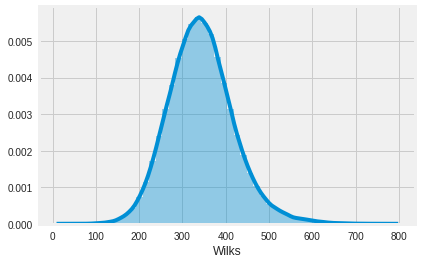

In [36]:
sns.distplot(recent_1['Wilks']) #Would we call this a normal distribution? asking for a friend.

In [37]:
recent_1.query('Competition_experience == 1')#This will tell me the most recent meet for every athlete in my dataset (100911 observations)

,MeetID,Sex,Equipment,Age,Division,BodyweightKg,Place,Wilks,AthID,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,EventDate,est_birth_year,Competition_experience
30119,1312,0,3,23.0,F-OR,55.25,1,454.830,83730,gpc-aus/1802,GPC-AUS,2018-01-28,Australia,NSW,NaN,2018-01-28,1995.0,1
30120,1312,1,3,32.0,M-OR,71.05,1,313.070,79778,gpc-aus/1802,GPC-AUS,2018-01-28,Australia,NSW,NaN,2018-01-28,1986.0,1
30121,1312,1,3,31.0,M-OR,80.35,1,337.010,74739,gpc-aus/1802,GPC-AUS,2018-01-28,Australia,NSW,NaN,2018-01-28,1987.0,1
30122,1312,0,0,30.0,F-OE,67.40,1,515.960,60747,gpc-aus/1802,GPC-AUS,2018-01-28,Australia,NSW,NaN,2018-01-28,1988.0,1
30123,1312,1,3,24.0,M-OR,89.80,1,353.110,40685,gpc-aus/1802,GPC-AUS,2018-01-28,Australia,NSW,NaN,2018-01-28,1994.0,1
30124,1312,1,3,34.0,M-OR,118.85,1,348.620,51913,gpc-aus/1802,GPC-AUS,2018-01-28,Australia,NSW,NaN,2018-01-28,1984.0,1
30125,1312,1,3,39.0,M-OR,108.25,2,411.070,26960,gpc-aus/1802,GPC-AUS,2018-01-28,Australia,NSW,NaN,2018-01-28,1979.0,1
30126,1312,1,3,26.0,M-OR,107.15,1,452.500,76762,gpc-aus/1802,GPC-AUS,2018-01-28,Australia,NSW,NaN,2018-01-28,1992.0,1
30180,1313,1,3,25.0,M-OR,100.00,4,418.400,1131,gpc-aus/1803,GPC-AUS,2018-01-27,Australia,VIC,NaN,2018-01-27,1993.0,1
30177,1313,1,3,29.0,M-OR,99.80,1,493.350,67385,gpc-aus/1803,GPC-AUS,2018-01-27,Australia,VIC,NaN,2018-01-27,1989.0,1


In [38]:
recent_1.query('EventDate >= "20161231"') #Build off of this to drop athletes that had their most recent event within X number of months. If competition experience is 1, and date is older that 12-31-16, drop them from concideration? (85016 observations)

,MeetID,Sex,Equipment,Age,Division,BodyweightKg,Place,Wilks,AthID,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,EventDate,est_birth_year,Competition_experience
30119,1312,0,3,23.0,F-OR,55.25,1,454.83,83730,gpc-aus/1802,GPC-AUS,2018-01-28,Australia,NSW,NaN,2018-01-28,1995.0,1
30120,1312,1,3,32.0,M-OR,71.05,1,313.07,79778,gpc-aus/1802,GPC-AUS,2018-01-28,Australia,NSW,NaN,2018-01-28,1986.0,1
30121,1312,1,3,31.0,M-OR,80.35,1,337.01,74739,gpc-aus/1802,GPC-AUS,2018-01-28,Australia,NSW,NaN,2018-01-28,1987.0,1
30122,1312,0,0,30.0,F-OE,67.40,1,515.96,60747,gpc-aus/1802,GPC-AUS,2018-01-28,Australia,NSW,NaN,2018-01-28,1988.0,1
30123,1312,1,3,24.0,M-OR,89.80,1,353.11,40685,gpc-aus/1802,GPC-AUS,2018-01-28,Australia,NSW,NaN,2018-01-28,1994.0,1
30124,1312,1,3,34.0,M-OR,118.85,1,348.62,51913,gpc-aus/1802,GPC-AUS,2018-01-28,Australia,NSW,NaN,2018-01-28,1984.0,1
30125,1312,1,3,39.0,M-OR,108.25,2,411.07,26960,gpc-aus/1802,GPC-AUS,2018-01-28,Australia,NSW,NaN,2018-01-28,1979.0,1
30126,1312,1,3,26.0,M-OR,107.15,1,452.50,76762,gpc-aus/1802,GPC-AUS,2018-01-28,Australia,NSW,NaN,2018-01-28,1992.0,1
30180,1313,1,3,25.0,M-OR,100.00,4,418.40,1131,gpc-aus/1803,GPC-AUS,2018-01-27,Australia,VIC,NaN,2018-01-27,1993.0,1
30177,1313,1,3,29.0,M-OR,99.80,1,493.35,67385,gpc-aus/1803,GPC-AUS,2018-01-27,Australia,VIC,NaN,2018-01-27,1989.0,1


In [39]:
dropNext =['Place', 'MeetPath', 'MeetTown', 'Date', 'MeetID', 'Age', 'Division', 'Federation', 'MeetState']
recent_1 = recent_1.drop(dropNext, axis=1)

In [40]:
# for i in recent_1['MeetCountry']:
#     if i = 'USA'
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('USA', 'NAmerica')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('Canada', 'NAmerica')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('US Virgin Islands', 'NAmerica')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('Brazil', 'NAmerica')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('Colombia', 'SAmerica')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('Cayman Islands', 'NAmerica')

recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('Peru', 'SAmerica')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('Puerto Rico', 'NAmerica')


recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('UK', 'Europe')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('England', 'Europe')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('Ireland', 'Europe')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('Czechia', 'Europe')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('Germany', 'Europe')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('Norway', 'Europe')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('Sweden', 'Europe')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('Scotland', 'Europe')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('Poland', 'Europe')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('Finland', 'Europe')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('N.Ireland', 'Europe')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('Ukraine', 'Europe')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('Luxembourg', 'Europe')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('N.Europe', 'Europe')

recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('Iceland', 'Europe')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('Estonia', 'Europe')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('Serbia', 'Europe')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('Italy', 'Europe')

recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('Belarus', 'Europe')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('Spain', 'Europe')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('France', 'Europe')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('Denmark', 'Europe')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('Wales', 'Europe')

recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('Singapore', 'Asia')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('Russia', 'Asia')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('Israel', 'Asia')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('Malaysia', 'Asia')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('Kazakhstan', 'Asia')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('South Africa', 'Africa')

recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('Australia', 'SoPac')
recent_1['MeetCountry'] = recent_1['MeetCountry'].str.replace('New Zealand', 'SoPac')

In [41]:
recent_1.rename(columns={'MeetCountry':'WhereHeld'}, inplace=True)
drop = ['MeetState', 'EventDate']
data.drop(drop, axis=1, inplace=True)

NameError: name 'data' is not defined

THIS CREATES df, A DATAFRAME THAT IS LIMITED TO OBSERVATIONS WHERE THE ATHLETES MOST RECENT EVENT IS MORE RECENT THAT SEPT 30, 2016.(18 months)

In [42]:
df = recent_1.query('Competition_experience == 1 & EventDate >= "20160930"') #This is a dataframe of athletes whose most recent meet is within 18 months. It might be better to create a list of athletes who's most recent meet is OLDER than 18 months, so that I can drop those instead of keeping these(Incomplete as it only keeps first meet scores)
second_meet_df = recent_1.query('Competition_experience == 2') # & EventDate >= "20150930"') #I have introduced an issue, athletes whose most recent event was prior to Sept 30, 2016, but second most recent is in our dataframe. This will need to be addressed.
third_meet_df = recent_1.query('Competition_experience == 3') #& EventDate >= "20140930"')

In [43]:
print(df.shape, second_meet_df.shape, third_meet_df.shape) #(55398, 14) (48973, 14) (29302, 14)

(55398, 9) (48973, 9) (29302, 9)


In [44]:
df = df.add_prefix('First_')
second_meet_df = second_meet_df.add_prefix('Second_')
third_meet_df = third_meet_df.add_prefix('Third_')

In [45]:
df.rename(columns={'First_AthID': 'AthID'}, inplace=True)
second_meet_df.rename(columns={'Second_AthID': 'AthID'}, inplace=True)
third_meet_df.rename(columns={'Third_AthID': 'AthID'}, inplace=True)
df.head()

,First_Sex,First_Equipment,First_BodyweightKg,First_Wilks,AthID,First_WhereHeld,First_EventDate,First_est_birth_year,First_Competition_experience
30119,0,3,55.25,454.83,83730,SoPac,2018-01-28,1995.0,1
30120,1,3,71.05,313.07,79778,SoPac,2018-01-28,1986.0,1
30121,1,3,80.35,337.01,74739,SoPac,2018-01-28,1987.0,1
30122,0,0,67.40,515.96,60747,SoPac,2018-01-28,1988.0,1
30123,1,3,89.80,353.11,40685,SoPac,2018-01-28,1994.0,1


In [46]:
second_meet_df.head()

,Second_Sex,Second_Equipment,Second_BodyweightKg,Second_Wilks,AthID,Second_WhereHeld,Second_EventDate,Second_est_birth_year,Second_Competition_experience
165758,1,2,92.9,405.39,81353,NAmerica,2018-01-14,1963.5,2
165766,1,1,64.0,352.48,29282,NAmerica,2018-01-14,1994.5,2
24715,1,1,80.7,331.01,84594,NAmerica,2018-01-06,NaN,2
24696,1,1,79.9,336.49,51352,NAmerica,2017-12-30,NaN,2
24680,1,1,126.0,278.78,57051,NAmerica,2017-12-30,NaN,2


In [47]:
third_meet_df.head()

,Third_Sex,Third_Equipment,Third_BodyweightKg,Third_Wilks,AthID,Third_WhereHeld,Third_EventDate,Third_est_birth_year,Third_Competition_experience
204230,0,2,80.10,358.89,76546,NAmerica,2017-12-02,1998.5,3
190690,1,1,54.80,160.43,41279,NAmerica,2017-11-19,2004.5,3
198224,0,1,53.56,228.44,37063,NAmerica,2017-11-18,2005.5,3
82711,1,3,105.78,432.56,22044,NAmerica,2017-11-04,NaN,3
85691,0,3,58.97,261.40,4064,NAmerica,2017-11-04,NaN,3


In [48]:
df = pd.merge(df, second_meet_df, on='AthID')
df = pd.merge(df, third_meet_df, on='AthID')

In [49]:
df.isnull().sum()

First_Sex                            0
First_Equipment                      0
First_BodyweightKg                   0
First_Wilks                          0
AthID                                0
First_WhereHeld                      0
First_EventDate                      0
First_est_birth_year              9929
First_Competition_experience         0
Second_Sex                           0
Second_Equipment                     0
Second_BodyweightKg                  0
Second_Wilks                         0
Second_WhereHeld                     0
Second_EventDate                     0
Second_est_birth_year            11462
Second_Competition_experience        0
Third_Sex                            0
Third_Equipment                      0
Third_BodyweightKg                   0
Third_Wilks                          0
Third_WhereHeld                      0
Third_EventDate                      0
Third_est_birth_year             13195
Third_Competition_experience         0
dtype: int64

In [50]:
df.set_index('AthID', inplace=True)
df.head()

,First_Sex,First_Equipment,First_BodyweightKg,First_Wilks,First_WhereHeld,First_EventDate,First_est_birth_year,First_Competition_experience,Second_Sex,Second_Equipment,...,Second_est_birth_year,Second_Competition_experience,Third_Sex,Third_Equipment,Third_BodyweightKg,Third_Wilks,Third_WhereHeld,Third_EventDate,Third_est_birth_year,Third_Competition_experience
AthID,,,,,,,,,,,,,,,,,,,,,
1131,1,3,100.0,418.40,SoPac,2018-01-27,1993.0,1,1,1,...,NaN,2,1,3,100.00,413.84,SoPac,2017-09-09,1992.0,3
67385,1,3,99.8,493.35,SoPac,2018-01-27,1989.0,1,1,3,...,1988.0,2,1,3,99.50,500.05,SoPac,2017-07-21,1989.0,3
98187,1,3,98.8,334.84,SoPac,2018-01-27,1969.0,1,1,1,...,1968.0,2,1,3,93.80,340.99,SoPac,2012-11-09,NaN,3
13688,1,3,98.0,395.80,SoPac,2018-01-27,1969.0,1,1,3,...,1969.0,2,1,3,89.80,399.45,SoPac,2014-11-21,1968.0,3
26593,1,3,89.7,380.49,SoPac,2018-01-27,1990.0,1,1,2,...,NaN,2,1,2,74.57,306.66,NAmerica,2017-02-18,NaN,3


In [53]:
df['birth_year'] = round(df[['First_est_birth_year', 'Second_est_birth_year', 'Third_est_birth_year']].mean(axis=1))
df['birth_year'].describe()

count    12254.000000
mean      1986.711686
std         11.696076
min       1934.000000
25%       1982.000000
50%       1990.000000
75%       1995.000000
max       2008.000000
Name: birth_year, dtype: float64

In [54]:
drop_BY= ['First_est_birth_year', 'Second_est_birth_year', 'Third_est_birth_year']
df.drop(drop_BY, axis=1, inplace=True)

In [55]:
df = df[np.isfinite(df['birth_year'])]

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12254 entries, 1131 to 26698
Data columns (total 22 columns):
First_Sex                        12254 non-null int64
First_Equipment                  12254 non-null int64
First_BodyweightKg               12254 non-null float64
First_Wilks                      12254 non-null float64
First_WhereHeld                  12254 non-null object
First_EventDate                  12254 non-null datetime64[ns]
First_Competition_experience     12254 non-null int64
Second_Sex                       12254 non-null int64
Second_Equipment                 12254 non-null int64
Second_BodyweightKg              12254 non-null float64
Second_Wilks                     12254 non-null float64
Second_WhereHeld                 12254 non-null object
Second_EventDate                 12254 non-null datetime64[ns]
Second_Competition_experience    12254 non-null int64
Third_Sex                        12254 non-null int64
Third_Equipment                  12254 non-null in

In [57]:
recent_1.query('AthID == 100656')

,Sex,Equipment,BodyweightKg,Wilks,AthID,WhereHeld,EventDate,est_birth_year,Competition_experience
144063,1,2,51.35,245.82,100656,NAmerica,2017-03-11,NaN,1
141568,1,2,51.44,245.36,100656,NAmerica,2017-02-25,NaN,2
128174,1,2,51.44,240.86,100656,NAmerica,2017-01-28,NaN,3
124320,1,2,50.80,246.37,100656,NAmerica,2017-01-21,NaN,4
121306,1,2,50.80,239.53,100656,NAmerica,2017-01-14,NaN,5
119665,1,2,51.35,239.05,100656,NAmerica,2017-01-03,NaN,6
118449,1,2,45.90,240.17,100656,NAmerica,2016-03-12,NaN,7
98699,1,2,44.72,226.58,100656,NAmerica,2016-01-23,NaN,8
96826,1,2,43.54,228.57,100656,NAmerica,2016-01-16,NaN,9


In [58]:
df.query('AthID == 100656')

,First_Sex,First_Equipment,First_BodyweightKg,First_Wilks,First_WhereHeld,First_EventDate,First_Competition_experience,Second_Sex,Second_Equipment,Second_BodyweightKg,...,Second_EventDate,Second_Competition_experience,Third_Sex,Third_Equipment,Third_BodyweightKg,Third_Wilks,Third_WhereHeld,Third_EventDate,Third_Competition_experience,birth_year
AthID,,,,,,,,,,,,,,,,,,,,,


In [59]:
recent_1.query('AthID == 4')

,Sex,Equipment,BodyweightKg,Wilks,AthID,WhereHeld,EventDate,est_birth_year,Competition_experience
223198,1,1,123.9,376.783,4,NAmerica,2016-02-27,1994.0,1


In [60]:
df.query('AthID == 4')

,First_Sex,First_Equipment,First_BodyweightKg,First_Wilks,First_WhereHeld,First_EventDate,First_Competition_experience,Second_Sex,Second_Equipment,Second_BodyweightKg,...,Second_EventDate,Second_Competition_experience,Third_Sex,Third_Equipment,Third_BodyweightKg,Third_Wilks,Third_WhereHeld,Third_EventDate,Third_Competition_experience,birth_year
AthID,,,,,,,,,,,,,,,,,,,,,


In [61]:
df.shape

(12254, 22)

In [62]:
df.head()

,First_Sex,First_Equipment,First_BodyweightKg,First_Wilks,First_WhereHeld,First_EventDate,First_Competition_experience,Second_Sex,Second_Equipment,Second_BodyweightKg,...,Second_EventDate,Second_Competition_experience,Third_Sex,Third_Equipment,Third_BodyweightKg,Third_Wilks,Third_WhereHeld,Third_EventDate,Third_Competition_experience,birth_year
AthID,,,,,,,,,,,,,,,,,,,,,
1131,1,3,100.0,418.40,SoPac,2018-01-27,1,1,1,87.20,...,2017-09-30,2,1,3,100.00,413.84,SoPac,2017-09-09,3,1992.0
67385,1,3,99.8,493.35,SoPac,2018-01-27,1,1,3,102.60,...,2017-09-09,2,1,3,99.50,500.05,SoPac,2017-07-21,3,1989.0
98187,1,3,98.8,334.84,SoPac,2018-01-27,1,1,1,99.30,...,2017-10-07,2,1,3,93.80,340.99,SoPac,2012-11-09,3,1968.0
13688,1,3,98.0,395.80,SoPac,2018-01-27,1,1,3,89.80,...,2016-07-08,2,1,3,89.80,399.45,SoPac,2014-11-21,3,1969.0
26593,1,3,89.7,380.49,SoPac,2018-01-27,1,1,2,74.39,...,2017-02-23,2,1,2,74.57,306.66,NAmerica,2017-02-18,3,1990.0


In [63]:
df.isnull().sum()

First_Sex                        0
First_Equipment                  0
First_BodyweightKg               0
First_Wilks                      0
First_WhereHeld                  0
First_EventDate                  0
First_Competition_experience     0
Second_Sex                       0
Second_Equipment                 0
Second_BodyweightKg              0
Second_Wilks                     0
Second_WhereHeld                 0
Second_EventDate                 0
Second_Competition_experience    0
Third_Sex                        0
Third_Equipment                  0
Third_BodyweightKg               0
Third_Wilks                      0
Third_WhereHeld                  0
Third_EventDate                  0
Third_Competition_experience     0
birth_year                       0
dtype: int64

## This is important

In [64]:
df.to_csv('AthleteResults.csv', index=False)